<a href="https://colab.research.google.com/github/vagrantxiao/colab/blob/main/mnist_sample_2211282.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


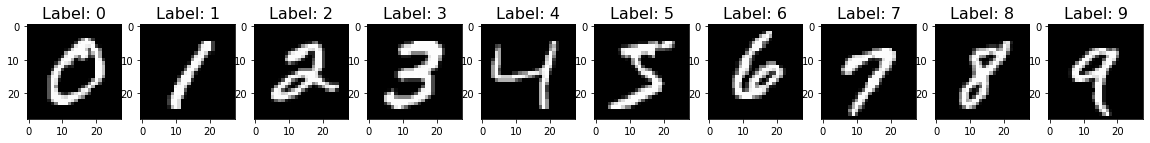

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
num_classes = 10
f, ax = plt.subplots(1, num_classes,  figsize=(20, 20))

for i in range(0, num_classes):
  sample=x_train[y_train==i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)
  

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(x_train.shape)

dataset_files = []
for i in range(10): dataset_files.append(open('/content/drive/My Drive/mnist/dataset'+str(i)+'.txt', 'w'))

N=60000
#f, ax = plt.subplots(N, 1, figsize=(30, 30))

new_s_list = []
for s in range(N):
  if s%1000==0: print(s)
  my_list = []
  for i in range(14):
    for j in range(14):
      if x_train[s][2*i][2*j] > 0:
        my_list.append(1)
      else:
        my_list.append(0)

  out_str=''
  for i in range(6):
    out_int = 0
    for j in range(i*32, i*32+32): out_int = (out_int << 1)+my_list[j]
    if i%2 == 0:
      out_str +='0x'+str(hex(out_int).replace('0x', '').zfill(8))
    else:
      out_str +=str(hex(out_int).replace('0x', '').zfill(8))+', '
    
  
  out_int = 0
  for j in range(192, 196): out_int = (out_int << 1)+my_list[j]
  out_str +='0x'+str(hex(out_int).replace('0x', '').zfill(8))+'00000000,'

  # print(out_str)
  dataset_files[int(y_train[s])].write(out_str+'\n')

  np_list = np.array(my_list)
  # ax[s].imshow(np_list.reshape(14, 14), cmap='gray')
  # ax[s].set_title("Label={}".format(y_train[s]))

for i in range(10): dataset_files[i].close()

In [ ]:
print(x_test.shape)

test_data_file = open('/content/drive/My Drive/mnist/test.txt', 'w')
test_label_file = open('/content/drive/My Drive/mnist/test_label.txt', 'w')

N=10000
#f, ax = plt.subplots(N, 1, figsize=(30, 30))

new_s_list = []
for s in range(N):
  if s%1000==0: print(s)
  test_label_file.write(str(y_test[s])+'\n')
  my_list = []
  for i in range(14):
    for j in range(14):
      if x_test[s][2*i][2*j] > 0:
        my_list.append(1)
      else:
        my_list.append(0)

  out_str=''
  for i in range(6):
    out_int = 0
    for j in range(i*32, i*32+32): out_int = (out_int << 1)+my_list[j]
    if i%2 == 0:
      out_str +='0x'+str(hex(out_int).replace('0x', '').zfill(8))
    else:
      out_str +=str(hex(out_int).replace('0x', '').zfill(8))+', '
    
  
  out_int = 0
  for j in range(192, 196): out_int = (out_int << 1)+my_list[j]
  out_str +='0x'+str(hex(out_int).replace('0x', '').zfill(8))+'00000000,'

  #print(out_str)
  test_data_file.write(out_str+'\n')

  np_list = np.array(my_list)
  #ax[s].imshow(np_list.reshape(14, 14), cmap='gray')
  #ax[s].set_title("Label={}".format(y_test[s]))

test_data_file.close()
test_label_file.close()

(10000, 28, 28)
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
